In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima

# Load the dataset
df = pd.read_csv(f"../csv_datas/BTCUSDT_1d")  # Replace "your_dataset.csv" with the actual file path

df.head()
# Preprocess the dataset
df['time'] = pd.to_datetime(df['time'])  # Convert the 'time' column to datetime format
df = df.set_index('time')  # Set the 'time' column as the index

# Select relevant columns for ARIMA
selected_columns = ['close']  # Adjust based on your specific column names
df_selected = df[selected_columns]

# Split the dataset into training and testing sets
train_size = int(len(df_selected) * 0.8)  # 80% for training, 20% for testing
train_data = df_selected[:train_size]
test_data = df_selected[train_size:]

# Find the best hyperparameters using auto_arima
model = auto_arima(train_data['close'], trace=True, error_action='ignore', suppress_warnings=True)

# Fit the ARIMA model with the best hyperparameters
model.fit(train_data['close'])

# Generate predictions on the test data
predictions = model.predict(n_periods=len(test_data), )

# Evaluate the model's performance
mse = np.mean((predictions - test_data['close']) ** 2)
mae = np.mean(np.abs(predictions - test_data['close']))

# Plot the actual prices and predicted prices
plt.plot(test_data.index, test_data['close'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ARIMA: Actual vs. Predicted Prices')
plt.legend()
plt.show()


ADF Statistic: -2.877996384631084
p-value: 0.04796720235506541


/usr/local/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferre

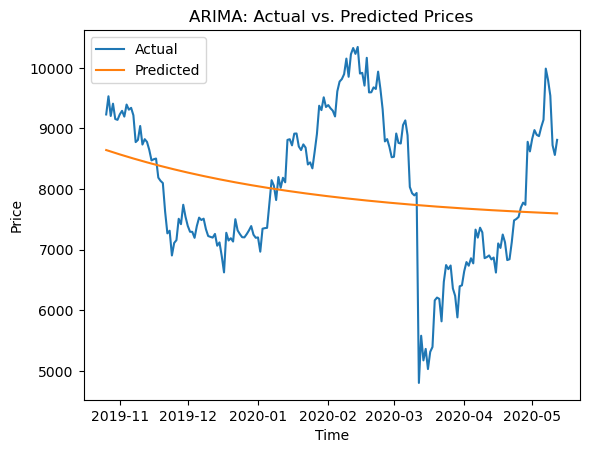

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv(f"../csv_datas/BTCUSDT_1d")  # Replace with the actual file path

# Preprocess the dataset
df['time'] = pd.to_datetime(df['time'])  # Convert the 'time' column to datetime format
df = df.set_index('time')  # Set the 'time' column as the index

# Select relevant columns for ARIMA
selected_columns = ['open', 'high', 'low', 'close', 'coin', 'timeframe']  # Adjust based on your specific column names
df_selected = df[selected_columns]

# Calculate the gain (adjusted close minus open)
# df_selected['gain'] = df_selected['close'] - df_selected['open']
# df_selected = df_selected.dropna()  # Remove the first NaN value

# Check the stationarity of the data
result = adfuller(df_selected['close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Perform differencing if the data is non-stationary
if result[1] > 0.05:  # Check if the data is non-stationary
    df_selected['close_diff'] = df_selected['close'] - df_selected['close'].shift(1)  # Perform first-order differencing
    df_selected = df_selected.dropna()  # Remove the first NaN value

# Split the dataset into training and testing sets
train_size = int(len(df_selected) * 0.8)  # 80% for training, 20% for testing
train_data = df_selected[:train_size]
test_data = df_selected[train_size:]

# Fit the ARIMA model with different orders
orders = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (0, 1, 1), (1, 0, 1)]  # Experiment with different orders
best_mse = float('inf')
best_model = None

for order in orders:
    model = ARIMA(train_data['close'], order=order)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train_data), end=len(df_selected) - 1)

    mse = np.mean((predictions - test_data['close']) ** 2)
    if mse < best_mse:
        best_mse = mse
        best_model = model_fit

# Generate predictions on the test data using the best model
best_predictions = best_model.predict(start=len(train_data), end=len(df_selected) - 1)

# Plot the actual prices and predicted prices
plt.plot(test_data.index, test_data['close'], label='Actual')
plt.plot(test_data.index, best_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ARIMA: Actual vs. Predicted Prices')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


# Load the dataset
df = pd.read_csv(f"../csv_datas/BTCUSDT_1d")  # Replace "your_dataset.csv" with the actual file path

# Preprocess the dataset
df['time'] = pd.to_datetime(df['time'])  # Convert the 'time' column to datetime format
df = df.set_index('time')  # Set the 'time' column as the index

# Select relevant columns for SARIMA
selected_columns = ['open', 'high', 'low', 'close']  # Adjust based on your specific column names
df_selected = df[selected_columns]

# # Calculate the gain (adjusted close minus open)
# df_selected['gain'] = df_selected['close'] - df_selected['open']
# df_selected = df_selected.dropna()  # Remove the first NaN value

# Check the stationarity of the data
result = adfuller(df_selected['close'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# Split the dataset into training and testing sets
train_size = int(len(df_selected) * 0.8)  # 80% for training, 20% for testing
train_data = df_selected[:train_size]
test_data = df_selected[train_size:]

# Fit the SARIMA model with different orders and seasonal orders
orders = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0), (0, 1, 1), (1, 0, 1)]  # Experiment with different orders
seasonal_orders = [(1, 0, 0, 12), (0, 1, 0, 12), (0, 0, 1, 12), (1, 1, 0, 12), (0, 1, 1, 12), (1, 0, 1, 12)]  # Experiment with different seasonal orders
best_mse = float('inf')
best_model = None

for order in orders:
    for seasonal_order in seasonal_orders:
        model = SARIMAX(train_data['close'], order=order, seasonal_order=seasonal_order)
        model_fit = model.fit()
        predictions = model_fit.predict(start=len(train_data), end=len(df_selected) - 1)

        mse = np.mean((predictions - test_data['close']) ** 2)
        if mse < best_mse:
            best_mse = mse
            best_model = model_fit

# Generate predictions on the test data using the best model
best_predictions = best_model.predict(start=len(train_data), end=len(df_selected) - 1)

# Plot the actual gains and predicted gains
plt.plot(test_data.index, test_data['close'], label='Actual')
plt.plot(test_data.index, best_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Gain')
plt.title('SARIMA: Actual vs. Predicted Gains')
plt.legend()
plt.show()
